In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
url = 'https://raw.githubusercontent.com/malle72/finalproject/master/la_loans.csv'

In [3]:
loans_df = pd.read_csv(url)

In [6]:
loans_df.head()

,app_accepted,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,...,purchaser_type_name,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,1,463735,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,424,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,8060.0,6.440000,63300.0,179.789993,2432.0,3051.0
1,1,13951,Federal Deposit Insurance Corporation,FDIC,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Not owner-occupied as a principal dwelling,58,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
2,1,75-2921540,Department of Housing and Urban Development,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,87,Not applicable,...,Freddie Mac (FHLMC),NaN,Not a HOEPA loan,Secured by a first lien,11628.0,16.139999,68100.0,169.660004,3549.0,4049.0
3,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,80,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
4,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,64,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a subordinate lien,2667.0,66.970001,53700.0,65.779999,209.0,1081.0


In [7]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_accepted                    148996 non-null  int64  
 1   respondent_id                   148996 non-null  object 
 2   agency_name                     148996 non-null  object 
 3   agency_abbr                     148996 non-null  object 
 4   loan_type_name                  148996 non-null  object 
 5   property_type_name              148996 non-null  object 
 6   loan_purpose_name               148996 non-null  object 
 7   owner_occupancy_name            148996 non-null  object 
 8   loan_amount_000s                148996 non-null  int64  
 9   preapproval_name                148996 non-null  object 
 10  applicant_ethnicity_name        148996 non-null  object 
 11  co_applicant_ethnicity_name     148996 non-null  object 
 12  applicant_race_n

In [8]:
loans_df.describe()

,app_accepted,loan_amount_000s,applicant_sex,applicant_income_000s,rate_spread,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,148996.000000,148996.000000,148996.000000,135141.000000,10914.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000
mean,0.559230,164.155742,1.523229,90.640857,3.182587,5790.106701,33.987342,59589.701815,112.088414,1562.809525,2202.367615
std,0.496481,374.476442,0.765829,502.567417,1.851668,2860.910917,24.677483,6779.225197,39.329715,897.877141,1010.090677
min,0.000000,1.000000,1.000000,1.000000,1.500000,0.000000,0.000000,47200.000000,0.000000,0.000000,0.000000
25%,0.000000,75.000000,1.000000,43.000000,1.790000,3689.000000,15.470000,53700.000000,84.019997,936.000000,1480.000000
50%,1.000000,134.000000,1.000000,65.000000,2.330000,5293.000000,26.639999,61600.000000,108.879997,1416.000000,2084.000000
75%,1.000000,203.000000,2.000000,102.000000,4.180000,7323.000000,47.400002,63300.000000,134.199997,2014.000000,2721.000000
max,1.000000,43448.000000,4.000000,147417.000000,24.980000,16628.000000,100.000000,68100.000000,333.570007,4838.000000,5690.000000


In [13]:
loans_df[loans_df.hud_median_family_income.isna()]

,app_accepted,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,...,purchaser_type_name,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
12,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Not owner-occupied as a principal dwelling,81,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
57,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Owner-occupied as a principal dwelling,75,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
62,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Owner-occupied as a principal dwelling,95,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
73,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Owner-occupied as a principal dwelling,56,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
75,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Owner-occupied as a principal dwelling,81,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148889,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Not owner-occupied as a principal dwelling,44,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
148893,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Not owner-occupied as a principal dwelling,30,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
148898,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Not owner-occupied as a principal dwelling,38,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN
148906,0,7162800002,Department of Housing and Urban Development,HUD,Conventional,Manufactured housing,Home purchase,Not owner-occupied as a principal dwelling,48,Not applicable,...,Loan was not originated or was not sold in cal...,NaN,Not a HOEPA loan,Secured by a first lien,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
loans_df['agency_abbr'].value_counts()

HUD     78438
CFPB    28140
FDIC    26370
OCC      8173
NCUA     5768
FRS      2107
Name: agency_abbr, dtype: int64

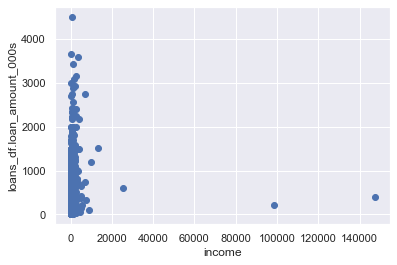

In [6]:
plt.scatter(y=loans_df.loan_amount_000s,x=loans_df.applicant_income_000s)
plt.ylabel('loans_df.loan_amount_000s')
plt.xlabel('income')
plt.show()